In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.optimize import curve_fit

In [3]:
data = {"Mesh size" : [0, 45, 63, 90, 125, 180, 250, 355, 500, 710, 1000, 1400, 1800],
       "Mass retained" : [1.1, 1.9, 5.25, 7.5, 21.8, 37.5, 37.5, 97, 90, 112.5, 285, 52.5, np.nan]}

df = pd.DataFrame(data)
df

,Mesh size,Mass retained
0,0,1.10
1,45,1.90
2,63,5.25
3,90,7.50
4,125,21.80
5,180,37.50
6,250,37.50
7,355,97.00
8,500,90.00
9,710,112.50


In [4]:
# Step 1: Define the function for mass fractions
def mass_fraction(mass):
    '''This function requires the column of mass retained from the data frame to be parsed in.
    It will then compute the mass fractions.
    '''
    mass_frac = (mass / mass.sum()).round(3)
    return mass_frac

In [5]:
# Step 2: Define the function for the width i.e size of intervals
def class_width(mesh):
    ''' The column of mesh sizes from the data can be parsed into this function as the arguement.
    The function then uses the mesh sizes to compute the width.
    '''
    widths = mesh.diff()
    return widths

In [6]:
# Step 1: Define the function to calculate Dmean
def mean_size(mesh):
    ''' This function requires the mesh sizes to be parsed in and then 
    it calculates the mean between intervals of each sizes. 
    '''
    Dmean = mesh.rolling(2).mean().shift(-1)
    return Dmean

In [7]:
# Step 2: Compute the mass fractions, class sizes and the means.
df4 = df.copy()
df4['Mass fraction'] = mass_fraction(df4['Mass retained'])         
df4['Class width'] = class_width(df4['Mesh size']).shift(-1)   
df4['Dmean'] = mean_size(df4['Mesh size'])                     
df4['qr_prob'] = df4['Mass fraction'] / df4['Class width']         
df4

,Mesh size,Mass retained,Mass fraction,Class width,Dmean,qr_prob
0,0,1.10,0.001,45.0,22.5,0.000022
1,45,1.90,0.003,18.0,54.0,0.000167
2,63,5.25,0.007,27.0,76.5,0.000259
3,90,7.50,0.010,35.0,107.5,0.000286
4,125,21.80,0.029,55.0,152.5,0.000527
5,180,37.50,0.050,70.0,215.0,0.000714
6,250,37.50,0.050,105.0,302.5,0.000476
7,355,97.00,0.129,145.0,427.5,0.000890
8,500,90.00,0.120,210.0,605.0,0.000571
9,710,112.50,0.150,290.0,855.0,0.000517


In [8]:
df4 = df4.dropna()
df4

,Mesh size,Mass retained,Mass fraction,Class width,Dmean,qr_prob
0,0,1.10,0.001,45.0,22.5,0.000022
1,45,1.90,0.003,18.0,54.0,0.000167
2,63,5.25,0.007,27.0,76.5,0.000259
3,90,7.50,0.010,35.0,107.5,0.000286
4,125,21.80,0.029,55.0,152.5,0.000527
5,180,37.50,0.050,70.0,215.0,0.000714
6,250,37.50,0.050,105.0,302.5,0.000476
7,355,97.00,0.129,145.0,427.5,0.000890
8,500,90.00,0.120,210.0,605.0,0.000571
9,710,112.50,0.150,290.0,855.0,0.000517


In [9]:
x_axis = df4['Dmean']
x_axis

0       22.5
1       54.0
2       76.5
3      107.5
4      152.5
5      215.0
6      302.5
7      427.5
8      605.0
9      855.0
10    1200.0
11    1600.0
Name: Dmean, dtype: float64

In [10]:
y_axis = df4.qr_prob
y_axis

0     0.000022
1     0.000167
2     0.000259
3     0.000286
4     0.000527
5     0.000714
6     0.000476
7     0.000890
8     0.000571
9     0.000517
10    0.000950
11    0.000175
Name: qr_prob, dtype: float64

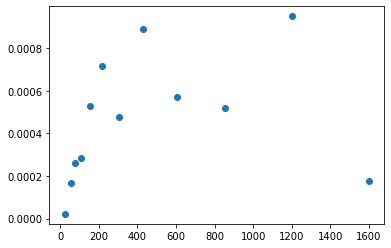

In [11]:
plt.scatter(x_axis, y_axis)

## Polynormial fit

In [12]:
def poly(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [13]:
params = curve_fit(poly, x_axis, y_axis)

In [14]:
a_fit = params[0][0]
b_fit = params[0][1]
c_fit = params[0][2]
d_fit = params[0][3]
print(a_fit, b_fit, c_fit, d_fit)

1.9904698121094206e-13 -1.4366281303980087e-09 1.865864336144696e-06 0.00013058180926373372


In [15]:
fit = []

for i in x_axis:
    fit.append(poly(i, a_fit, b_fit, c_fit, d_fit))


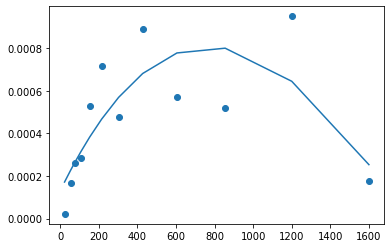

In [16]:
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit)

## Log norm fit 

In [17]:
def lognorm(x, mu, sigma) :
   return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)- 
   mu)**2)/(2*sigma**2))

In [18]:
params = curve_fit(lognorm, x_axis, y_axis)

In [19]:
print(params)

(array([6.80088112, 0.94026451]), array([[0.02498608, 0.0136887 ],
       [0.0136887 , 0.01464031]]))


In [20]:
mu = params[0][0]
sigma = params[0][1]
print(mu, sigma)

6.800881121915981 0.9402645068409572


In [21]:
logfit = []

for i in x_axis:
    logfit.append(lognorm(i, mu, sigma))

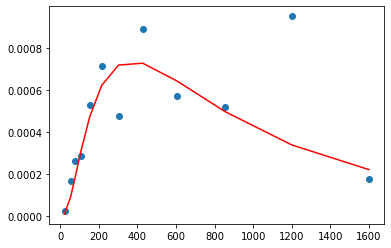

In [22]:
plt.scatter(x_axis, y_axis)


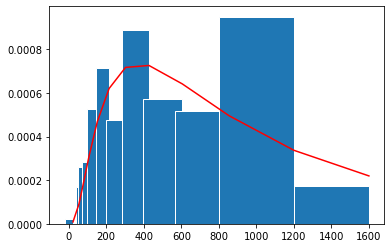

In [36]:
plt.bar(df4['Mesh size'], df4['qr_prob'], width=df4['Class width'], edgecolor='white')
plt.plot(x_axis, logfit, 'r')

## Weibull distribution